## PS4, MACS 30250
### Dr. Richard Evans, TA Zunda Xu
### Submitted by Junho Choi

### Question 1-(a).

Let us generate the vector of $\varepsilon_t$'s (`eps_vec`) as the question directs.

In [2]:
import scipy.stats as sts
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
                           random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

We have $\mu = z_0 = 11.4$ and $\rho=0.85$ by the question setup. Let us then try to generate `z_vec` (i.e. $\{z_t\}_{t=0}^{500}$) as follows.

In [3]:
import numpy as np
mu = 11.4
rho = 0.85
z_vec = [mu]
for i in range(1, T+1):
    z_next = rho*z_vec[i-1] + (1-rho)*mu + eps_vec[i-1]
    z_vec.append(z_next)
z_vec = np.array(z_vec)
print(z_vec.shape)

(501,)


Let us then plot the $\{z_t\}_{t=1}^{100}$ as follows.

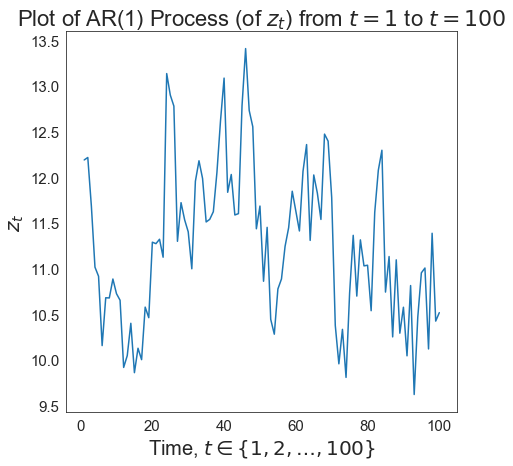

In [72]:
import seaborn as sb
import matplotlib.pyplot as plt
graphthis = z_vec[1:101]
plt.figure(figsize=(7,7))
sb.set_style('white')
plt.plot(range(1, 101), graphthis)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r"Time, $t\in\{1, 2, \ldots, 100\}$", size=20)
plt.ylabel(r"$z_t$", size=20)
plt.title(r"Plot of AR(1) Process (of $z_t$) from $t=1$ to $t=100$", size=22)
plt.show()

### Question 1-(b).

Let us create the vector (of size 5) `z_vals` as told by the question. Note that I first divide the interval $[\mu-3\sigma, \mu+3\sigma]$ into 5, equally-sized subintervals, then take the midpoints as the possible values. Using the `numpy.linspace` command directly by setting endpoints as $\mu-3\sigma$ and $\mu+3\sigma$ will not yield the same result.

In [6]:
lb, ub = mu-3*sigma, mu+3*sigma
interval= (ub - lb)/5
z_vals = []
for i in range(0, 5):
    if i == 0:
        addthis = lb + interval*0.5
    else:
        addthis = z_vals[i-1] + interval
    z_vals.append(addthis)
z_vals = np.array(z_vals)
print(z_vals[2]==mu) ## checking that the midpoint is mu

True


### Question 1-(c).

Let us create `z_cuts` as told by the question.

In [14]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
print(z_cuts.shape) ## checking the shape
print(z_cuts)

(4,)
[10.14 10.98 11.82 12.66]


In [15]:
## checking; the 4 numbers above should be the same as the 4 numbers below
## excluding the endpoints
z_cuts2 = np.linspace(mu-3*sigma, mu+3*sigma, 6)
print(z_cuts2)

[ 9.3  10.14 10.98 11.82 12.66 13.5 ]


Denoting the (empirical) Markov matrix as `markov` (which needs to be $5\times 5$ in size), let us create it as follows.

In [16]:
z_discrete = [mu] ## making the values into discrete ones
for i, z in enumerate(z_vec[1:]):
    appendthis = None
    for j, cut in enumerate(z_cuts):
        if z <= cut:
            appendthis = z_vals[j]
            break
    if appendthis is None:
        appendthis = z_vals[4]
    z_discrete.append(appendthis)

z_discrete = np.array(z_discrete)
    
print(z_discrete.shape) ## checking the shape
print(np.unique(z_discrete))

(501,)
[ 9.72 10.56 11.4  12.24 13.08]


In [17]:
import pandas as pd

In [18]:
## trying to make final check whether the discrete versions
## have been correctly created
df = pd.DataFrame([z_vec, z_discrete]).T
df.columns = ['continuous', 'discrete']
df.head(10)

,continuous,discrete
0,11.400000,11.40
1,12.188885,12.24
2,12.215957,12.24
3,11.683158,11.40
4,11.015539,11.40
5,10.915907,10.56
6,10.156775,10.56
7,10.680406,10.56
8,10.678425,10.56
9,10.885652,10.56


In [19]:
## checking the counts
uniquevals, counts = np.unique(z_discrete, return_counts=True)
print(uniquevals)
print(counts)

[ 9.72 10.56 11.4  12.24 13.08]
[ 76 106 136 113  70]


In [20]:
## trying to generate indices dictionary
index_dic = dict([])
for i, case in enumerate(z_discrete[:-1]):
    for j in uniquevals:
        if case == j:
            if index_dic.get(case) is None:
                index_dic[case] = np.array([i])
            else:
                index_dic[case] = np.append(index_dic[case], i)

In [21]:
shouldbe500 = 0
for i in index_dic.values():
    shouldbe500 += i.shape[0]
print(shouldbe500)

500


In [22]:
## finally generating the markov marix
markov = []
for j in uniquevals:
    markov_row = []
    base_indices = index_dic[j]
    indices_len = base_indices.shape[0]
    next_indices = base_indices + 1
    
    for i in uniquevals:
        count = (z_discrete[next_indices] == i).sum()
        pct = count / indices_len
        markov_row.append(pct)
    markov.append(markov_row)

markov = np.array(markov)

In [23]:
## markov matrix: checking that each row adds up to 1, just in case
## shows that there is very small loss due to calculations for rows 1 and 2
for i in range(0, 5):
    print(markov[i, :].sum())

0.9999999999999999
0.9999999999999999
1.0
1.0
1.0


Therefore, the completed Markov matrix (empirical) is as follows:

In [24]:
print(markov)

[[0.65333333 0.26666667 0.08       0.         0.        ]
 [0.16981132 0.48113208 0.28301887 0.05660377 0.00943396]
 [0.05882353 0.22058824 0.39705882 0.27205882 0.05147059]
 [0.00884956 0.04424779 0.36283186 0.43362832 0.15044248]
 [0.         0.         0.05714286 0.3        0.64285714]]


### Question 1-(d).

As suggested in the question, we start with the case where everyone is in bin 3; this is doable as we are calculating the conditional probability of being in bin 3 now, then ending up in bin 5 after 3 time periods. Note that we need to transpose the `markov` matrix to calculate it with a 1-d `numpy` array.

In [25]:
markov.T @ markov.T @ markov.T @ np.array([0, 0, 1, 0, 0])

array([0.12546704, 0.21689639, 0.29807036, 0.24041557, 0.11915063])

The above result shows that the conditional probability of $\Pr(z_{t+3} > \texttt{z_cuts}[3] | \texttt{z_cuts}[0] < z_t \leq \texttt{z_cuts}[1])$ (i.e. that we are in bin 3 now but end up in bin 5 after 3 stages) is approximately 11.92\%.

### Question 1-(e).

One way of finding the stationary distribution is to matrix multiply the transpose of Markov matrix over and over to any arbitrary 1-d array with the elements adding up to 1. If ergodic, the stationary distribution will be the same regardless of where we start (as long as the said 1-d array as elements adding up to 1).

In [26]:
from numpy.linalg import matrix_power as matpow
for i in range(0, 10):
    case1 = matpow(markov.T, i*20) @ np.array([0.2, 0.2, 0.2, 0.2, 0.2])
    print(case1)

[0.2 0.2 0.2 0.2 0.2]
[0.15575193 0.21330138 0.26857711 0.22375812 0.13861146]
[0.15577682 0.21331997 0.26857487 0.22373931 0.13858903]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858892]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]


In [27]:
## if ergodic, should be the same when starting at a different point
## pretty much the same
from numpy.linalg import matrix_power as matpow
for i in range(0, 10):
    case2 = matpow(markov.T, i*20) @ np.array([0.1, 0.1, 0.1, 0.1, 0.6])
    print(case2)

[0.1 0.1 0.1 0.1 0.6]
[0.15475526 0.21256059 0.26867014 0.22451035 0.13950365]
[0.15577183 0.21331626 0.26857534 0.22374307 0.13859349]
[0.15577692 0.21332005 0.26857486 0.22373923 0.13858894]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858892]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]
[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]


In [28]:
sum(case2) ## approximately 1; <1 most likely due to calculation

0.9999999999999963

So we see that the stationary percentages for bins 1 through 5 (in that order) are as follows, rounded to the nearest hundredth: $15.58\%, 21.33\%, 26.86\%, 22.37\%$, and $13.86\%$. This fully describes the stationary distribution. We can also try to do this using the eigenvalues and eigenvectors, as follows (and as shown in-class). The results are exactly the same as should be expected.

In [33]:
import numpy.linalg as LA
eigvals, eigvecmat = LA.eig(markov.T)
print(eigvals)

[1.         0.76731056 0.51337978 0.29559352 0.03172583]


In [37]:
eigvec = eigvecmat[:, 0] ## eigval that equals to 1 is in the 0th column.
eigvec = eigvec / eigvec.sum()
print(eigvec) ## this is exactly what we should find above!

[0.15577695 0.21332006 0.26857486 0.22373921 0.13858891]


### Question 1-(f).

Let us use the Markov transition matrix that we have found and the `unif_vec` we created to find the discrete-value version of the AR(1) process as follows. Firstly, as `unif_vec` is similar to finding the cumulative probability, we shall try to find the cumulative version of the Markov matrix as follows.

In [46]:
markov_cumulative = np.zeros((5, 5))
for i in range(0, markov_cumulative.shape[0]):
    for j in range(0, markov_cumulative.shape[1]):
        if j == 0:
            markov_cumulative[i, j] = markov[i, j]
        else:
            markov_cumulative[i, j] = markov[i, j] + markov_cumulative[i, j-1]

In [51]:
print(markov_cumulative) ## this is what we'll work with
print("\n", unif_vec[0])

[[0.65333333 0.92       1.         1.         1.        ]
 [0.16981132 0.6509434  0.93396226 0.99056604 1.        ]
 [0.05882353 0.27941176 0.67647059 0.94852941 1.        ]
 [0.00884956 0.05309735 0.4159292  0.84955752 1.        ]
 [0.         0.         0.05714286 0.35714286 1.        ]]

 0.8701241366272119


We begin at $\mu$ which is 11.4 (which is in bin 3), and the first entry in the `unif_vec` is approximately 0.8701. Then, we look at the cumulative version of the Markov matrix (i.e. `markov_cumulative`) and find that the next value should be in bin 4 (look at the row for bin 3, and find $0.8701 \leq 0.9485$). We will do this for all of the values in `unif_vec`.

In [56]:
discrete_ar1 = [mu]
bins_ar1 = [3]
for i in range(1, T+1):
    unif_to_look_at = unif_vec[i-1] ## for Python indexing
    starting_point = bins_ar1[i-1] - 1 ## for Python indexing
    which_cumul_row = markov_cumulative[starting_point, :]
    for j, case in enumerate(which_cumul_row):
        if unif_to_look_at <= case:
            break
    
    disc_ar1_next = uniquevals[j]
    discrete_ar1.append(disc_ar1_next)
    bins_ar1.append(j+1)

In [57]:
## checking that the t=1 bin is bin 4, as seen above
print(bins_ar1[1])

4


Now let us plot this discrete-version-AR(1) process with the continuous version that we found above, where $t=1, 2, \cdots, 100$. The two versions align reasonably well.

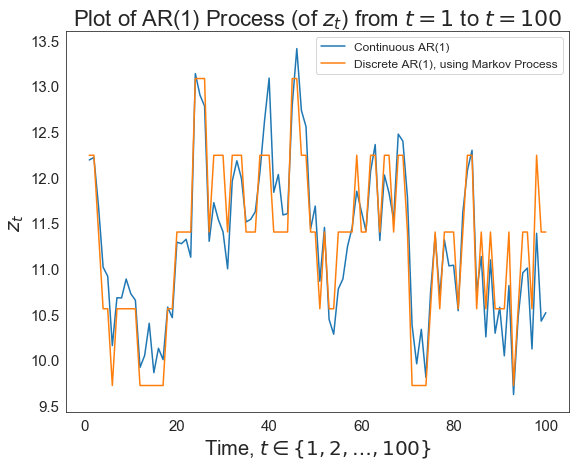

In [71]:
graphthis = z_vec[1:101]
graphthis_too = discrete_ar1[1:101]
plt.figure(figsize=(9,7))
plt.plot(range(1, 101), graphthis, label="Continuous AR(1)", )
plt.plot(range(1, 101), graphthis_too, label="Discrete AR(1), using Markov Process")
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel(r"Time, $t\in\{1, 2, \ldots, 100\}$", size=20)
plt.ylabel(r"$z_t$", size=20)
plt.title(r"Plot of AR(1) Process (of $z_t$) from $t=1$ to $t=100$", size=22)
plt.legend(loc='upper right', fontsize='large')
plt.show()